## Занятие 6. Нелинейные модели для классификации. Выбор лучшей модели для классификации. Построение программного конвеера

### k-Nearest Neighbors

In [1]:
import os
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

In [2]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataframe = read_csv(filename, names=names)
peek = data.head(20);peek
array = dataframe.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


### Naive Bayes

In [3]:
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataframe = read_csv(filename, names=names)
peek = data.head(20);peek
array = dataframe.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8374695863746959


### Classification and Regression Trees

In [4]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataframe = read_csv(filename, names=names)
peek = data.head(20);peek
array = dataframe.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9847032688035545


## Выбор лучшего алгоритма машинного обучения для задачи классификации

LR: 0.989072 (0.006707)
LDA: 0.976679 (0.013372)
KNN: 1.000000 (0.000000)
CART: 0.984703 (0.008878)
NB: 0.837470 (0.042496)
SVM: 0.997810 (0.004674)


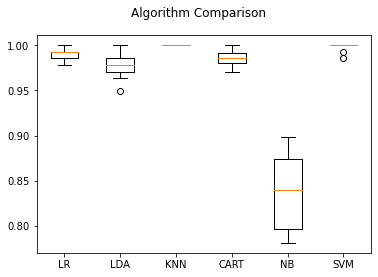

In [5]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataframe = read_csv(filename, names=names)
peek = data.head(20);peek
array = dataframe.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Создание пайплайна (программного конвеера)

### Программный конвеер подготовки данных и моделирования

In [6]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataframe = read_csv(filename, names=names)
peek = data.head(20);peek
array = dataframe.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9766793610494023


### Программный конвеер отбора признаков и моделирования

In [8]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataframe = read_csv(filename, names=names)
peek = data.head(20);peek
array = dataframe.values
# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
# create feature union
features = []
features.append(('pca', PCA(n_components=4)))
features.append(('select_best', SelectKBest(k=4)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9890722521950703
